In [ ]:
#Introduction to BERT

#Comparative analysis of various model on IMDB dataset for sentiment analysis
#based on articles and videos try to implement sentiment analysis using bert
# and implemented basic sentiment using nltk library

IMDB dataset having 50K movie reviews for natural language processing or Text analytics.
This is a dataset for binary sentiment classification containing substantially more data than previous benchmark datasets. We provide a set of 25,000 highly polar movie reviews for training and 25,000 for testing. So, predict the number of positive and negative reviews using either classification or deep learning algorithms.
For more dataset information, please go through the following link,
http://ai.stanford.edu/~amaas/data/sentiment/

In [ ]:
import numpy as np
import pandas as pd
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

import nltk
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
df = pd.read_csv("/content/drive/My Drive/IMDB Dataset.csv")
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [ ]:
df.shape

(50000, 2)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [ ]:
df.count()

review       50000
sentiment    50000
dtype: int64

In [ ]:
df['sentiment'].value_counts()

positive    25000
negative    25000
Name: sentiment, dtype: int64

In [ ]:
#1) remover Stowords, punctuation, numbers, html tags

In [ ]:
df[['review']].head(10)

,review
0,One of the other reviewers has mentioned that ...
1,A wonderful little production. <br /><br />The...
2,I thought this was a wonderful way to spend ti...
3,Basically there's a family where a little boy ...
4,"Petter Mattei's ""Love in the Time of Money"" is..."
5,"Probably my all-time favorite movie, a story o..."
6,I sure would like to see a resurrection of a u...
7,"This show was an amazing, fresh & innovative i..."
8,Encouraged by the positive comments about this...
9,If you like original gut wrenching laughter yo...


In [ ]:
df['review'][0]

"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fa

In [ ]:
from bs4 import BeautifulSoup
def html_remover(review):
    soup=BeautifulSoup(review,'html.parser')
    x = soup.get_text()
    return x

df['review']=df['review'].apply(html_remover)
df['review'][0]

"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.I would say the main appeal of the show is due to the fact that it goes where other shows wo

In [ ]:
#convert to lower cases
df['review'] = df['review'].str.lower()
df[['review']].head(5)

,review
0,one of the other reviewers has mentioned that ...
1,a wonderful little production. the filming tec...
2,i thought this was a wonderful way to spend ti...
3,basically there's a family where a little boy ...
4,"petter mattei's ""love in the time of money"" is..."


In [ ]:
# Remove punct. and spec. char
import re
def char_rem(review):
    review = re.sub('\[[^]]*\]', ' ', review)
    review = re.sub('[^a-zA-Z]', ' ', review)
    return review

df['review']=df['review'].apply(char_rem)
df['review'][0]

'one of the other reviewers has mentioned that after watching just   oz episode you ll be hooked  they are right  as this is exactly what happened with me the first thing that struck me about oz was its brutality and unflinching scenes of violence  which set in right from the word go  trust me  this is not a show for the faint hearted or timid  this show pulls no punches with regards to drugs  sex or violence  its is hardcore  in the classic use of the word it is called oz as that is the nickname given to the oswald maximum security state penitentary  it focuses mainly on emerald city  an experimental section of the prison where all the cells have glass fronts and face inwards  so privacy is not high on the agenda  em city is home to many  aryans  muslims  gangstas  latinos  christians  italians  irish and more    so scuffles  death stares  dodgy dealings and shady agreements are never far away i would say the main appeal of the show is due to the fact that it goes where other shows wo

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
def preprocess_text(review):
       
    # Remove non-letters and non-numbers       
    alphanum = re.sub("[^a-zA-Z0-9]", " ", review) 

    # Convert to lowercase and split into individual words
    words = alphanum.lower().split()                             

    # Remove stop words
    stop = set(stopwords.words("english"))          
    stopped = [w for w in words if not w in stop]   
    
    # Lemmatize the remaining words
    lmtzr = WordNetLemmatizer()
    tokens = [lmtzr.lemmatize(token) for token in stopped]
    
    # Return the preprocessed string
    return(" ".join(tokens))    

In [ ]:
df['review'] = df["review"].apply(preprocess_text) 
df['review'][0]

'one reviewer mentioned watching oz episode hooked right exactly happened first thing struck oz brutality unflinching scene violence set right word go trust show faint hearted timid show pull punch regard drug sex violence hardcore classic use word called oz nickname given oswald maximum security state penitentary focus mainly emerald city experimental section prison cell glass front face inwards privacy high agenda em city home many aryan muslim gangsta latino christian italian irish scuffle death stare dodgy dealing shady agreement never far away would say main appeal show due fact go show dare forget pretty picture painted mainstream audience forget charm forget romance oz mess around first episode ever saw struck nasty surreal say ready watched developed taste oz got accustomed high level graphic violence violence injustice crooked guard sold nickel inmate kill order get away well mannered middle class inmate turned prison bitch due lack street skill prison experience watching oz m

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud,STOPWORDS

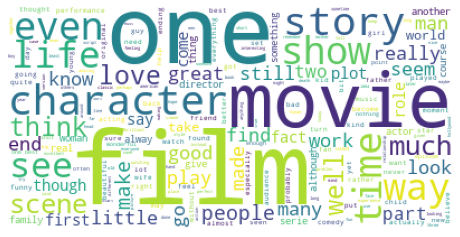

In [ ]:
df_pos = df[df['sentiment']=='positive']['review']

wordcloud1 = WordCloud(stopwords=STOPWORDS,
                      background_color='white',
                      ).generate(" ".join(df_pos))

plt.figure(1,figsize=(8, 8))
plt.imshow(wordcloud1)
plt.axis('off')
plt.show()

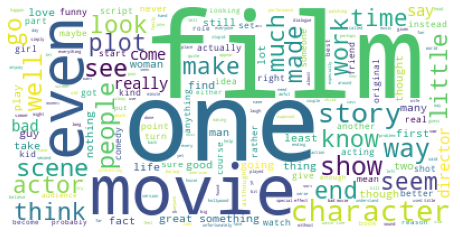

In [ ]:
df_neg = df[df['sentiment']=='negative']['review']

wordcloud1 = WordCloud(stopwords=STOPWORDS,
                      background_color='white',
                      ).generate(" ".join(df_neg))

plt.figure(1,figsize=(8, 8))
plt.imshow(wordcloud1)
plt.axis('off')
plt.show()

In [ ]:
# Converting string labels into numbers.
df['sentiment'].replace({'positive':1,'negative':0},inplace=True)

In [ ]:
from sklearn.model_selection import train_test_split

train, test, train_label, test_label = train_test_split(df['review'], df['sentiment'], test_size=0.5, random_state=42)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Creating a TF-IDF matrix
vectorizer = TfidfVectorizer()
vec_train = vectorizer.fit_transform(train)
vec_test = vectorizer.transform(test)


In [ ]:
from xgboost import XGBClassifier

clf_xgb = XGBClassifier(random_state=42) 
clf_xgb.fit(vec_train, train_label)

pred_train = clf_xgb.predict(vec_train)   
pred_test = clf_xgb.predict(vec_test)

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

print(classification_report(test_label, pred_test))

              precision    recall  f1-score   support

           0       0.85      0.74      0.79     12483
           1       0.77      0.87      0.82     12517

    accuracy                           0.81     25000
   macro avg       0.81      0.81      0.81     25000
weighted avg       0.81      0.81      0.81     25000



In [ ]:
accuracy_score(test_label,pred_test)

0.80736

In [ ]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(random_state=42)
clf.fit(vec_train, train_label)

# Predict Test set results
pred_test1 = clf.predict(vec_test)

In [ ]:
print(classification_report(test_label, pred_test1))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85     12483
           1       0.85      0.85      0.85     12517

    accuracy                           0.85     25000
   macro avg       0.85      0.85      0.85     25000
weighted avg       0.85      0.85      0.85     25000



In [ ]:
#Random forest model gives 85% accuracy score,
#and while xgboost classifier gives 80.736=81% accuracy on imdb positive/negative review dataset

In [ ]:
data = ['this movie was horrible, the plot was really boring. acting was okay',
        'the fild is really sucked. there is not plot and acting was bad',
        'what a beautiful movie. great plot. acting was good. will see it again']
vec_test2 = vectorizer.transform(data)
pred2 = clf.predict(vec_test2)

In [ ]:
tup = list(zip(data,pred2))
pd.DataFrame(tup, columns=['NewReview','Prediction'])

,NewReview,Prediction
0,"this movie was horrible, the plot was really b...",0
1,the fild is really sucked. there is not plot a...,0
2,what a beautiful movie. great plot. acting was...,1


In [ ]:
review_new = [
  "That movie was absolutely awful",
  "The acting was a bit lacking",
  "The film was creative and surprising",
  "Absolutely fantastic!",
  "best movie of the year, nice plot but only thing is worst acting"
]
vec_test3 = vectorizer.transform(review_new)
pred3 = clf.predict(vec_test3)

In [ ]:
tup1 = list(zip(review_new,pred3))
pd.DataFrame(tup1, columns=['NewReview','Prediction'])

,NewReview,Prediction
0,That movie was absolutely awful,0
1,The acting was a bit lacking,1
2,The film was creative and surprising,1
3,Absolutely fantastic!,1
4,"best movie of the year, nice plot but only thi...",0
